Comparing the results of all the models attempted.

In [1]:
import pandas as pd
df = pd.read_csv('./output_data/final_results.csv').drop('Unnamed: 0',axis=1)
df.head()

,model,accuracy score,F1 score,time,features
0,Logistic Regression,1.0,1.0,0.048277,1
1,Decision Tree,1.0,1.0,0.007636,1
2,Random Forest,1.0,1.0,0.149254,1
3,K-Nearest Neighbors,1.0,1.0,0.130554,1
4,Linear SVM,1.0,1.0,0.030291,1


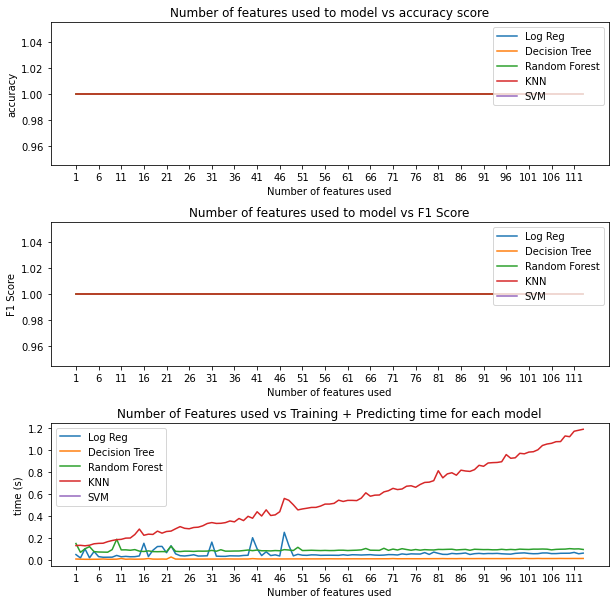

In [2]:
import matplotlib.pyplot as plt
import numpy as np

log_reg = df[df['model']=='Logistic Regression'][['features','F1 score','accuracy score','time']]
dt = df[df['model']=='Decision Tree'][['features','F1 score','accuracy score','time']]
rf = df[df['model']=='Random Forest'][['features','F1 score','accuracy score','time']]
knn = df[df['model']=='K-Nearest Neighbors'][['features','F1 score','accuracy score','time']]
svm = df[df['model']=='SVM'][['features','F1 score','accuracy score','time']]

x = df['features']
plt.figure(figsize=(10,10))
plt.subplot(3,1,1)
plt.plot(log_reg['features'],log_reg['accuracy score'],label='Log Reg')
plt.plot(dt['features'],dt['accuracy score'],label='Decision Tree')
plt.plot(rf['features'],rf['accuracy score'],label='Random Forest')
plt.plot(knn['features'],knn['accuracy score'],label='KNN')
plt.plot(svm['features'],svm['accuracy score'],label='SVM')
plt.legend()
plt.ylabel('accuracy')
plt.xlabel('Number of features used')
plt.title("Number of features used to model vs accuracy score")
plt.xticks(np.arange(min(x), max(x)+1, 5.0))

### F1 score plot
plt.subplot(3,1,2)
plt.plot(log_reg['features'],log_reg['F1 score'],label='Log Reg')
plt.plot(dt['features'],dt['F1 score'],label='Decision Tree')
plt.plot(rf['features'],rf['F1 score'],label='Random Forest')
plt.plot(knn['features'],knn['F1 score'],label='KNN')
plt.plot(svm['features'],svm['F1 score'],label='SVM')
plt.legend()
plt.ylabel('F1 Score')
plt.xlabel('Number of features used')
plt.title("Number of features used to model vs F1 Score")
plt.xticks(np.arange(min(x), max(x)+1, 5.0))
plt.subplots_adjust(hspace=0.4)

### Time
plt.subplot(3,1,3)
plt.plot(log_reg['features'],log_reg['time'],label='Log Reg')
plt.plot(dt['features'],dt['time'],label='Decision Tree')
plt.plot(rf['features'],rf['time'],label='Random Forest')
plt.plot(knn['features'],knn['time'],label='KNN')
plt.plot(svm['features'],svm['time'],label='SVM')
plt.legend()
plt.ylabel('time (s)')
plt.xlabel('Number of features used')
plt.title("Number of Features used vs Training + Predicting time for each model")
plt.xticks(np.arange(min(x), max(x)+1, 5.0))
plt.subplots_adjust(hspace=0.4)
plt.savefig("Model_evaluation.png")

plt.show()

## Feature Ranking

After converting into binary form, features were then fed into the models and ranked descendantly in accordance to the magnitude of their correlation coefficient with the target variable, class. Thus the first feature fed into the model had the highest magnitude of correlation, the second had the second highest, and so on. The first five rows of the feature rank table looked like this.

In [3]:
import numpy as np
import pandas as pd
data = pd.read_csv('./output_data/engineered_data.csv').drop('Unnamed: 0',axis=1)
corr = data.corr()['class']
corr = pd.DataFrame(corr).reset_index().rename(columns={'index':'Feature','class':'Correlation with target'})
corr['absolute'] = corr['Correlation with target'].apply(lambda x:np.abs(x))
corr = corr.sort_values(by='absolute',ascending=False).reset_index().drop('index',axis=1).drop('absolute',axis=1)
corr = corr.loc[1:]
corr.to_csv('./output_data/key_features.csv')
corr = corr.reset_index().rename(columns={'index':'Rank'})
corr

,Rank,Feature,Correlation with target
0,1,odor_n,-0.785557
1,2,odor_f,0.623842
2,3,stalk-surface-above-ring_k,0.587658
3,4,stalk-surface-below-ring_k,0.573524
4,5,ring-type_p,-0.540469
...,...,...,...
107,108,veil-color_y,0.032545
108,109,cap-color_c,-0.030910
109,110,cap-shape_x,-0.026886
110,111,cap-surface_g,0.023007


In [4]:
df = corr.copy()
df = df.head(19)
#df.drop(df.columns[-1], axis=1)

# Get column names
cols = df.columns

# Create a new DataFrame with just the markdown
# strings
df2 = pd.DataFrame([['---',]*len(cols)], columns=cols)

#Create a new concatenated DataFrame
df3 = pd.concat([df2, df])

#Save as markdown
df3.to_csv("feature_rank19.md", sep="|", index=False)

In [5]:
df3

,Rank,Feature,Correlation with target
0,---,---,---
0,1,odor_n,-0.785557
1,2,odor_f,0.623842
2,3,stalk-surface-above-ring_k,0.587658
3,4,stalk-surface-below-ring_k,0.573524
4,5,ring-type_p,-0.540469
5,6,gill-size_n,0.540024
6,7,gill-size_b,-0.540024
7,8,gill-color_b,0.538808
8,9,bruises_f,0.50153
